In [1]:
import pandas as pd
import re
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Get Data

In [26]:
!git clone https://github.com/sophialee0628/Quantium-virtual-internship.git

Cloning into 'Quantium-virtual-internship'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [41]:
transaction=pd.read_excel('QVI_transaction_data.xlsx',engine='openpyxl')

In [42]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [43]:
purchase_be=pd.read_csv('QVI_purchase_behaviour.csv')

In [44]:
purchase_be

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# Data Cleaning

## Change Date format

In [45]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin = '1899-12-30', unit='D')

In [46]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## PROD_NAME seperation
- could be seperated to brand, taste, and weight

### Weight seperation 
- make 'PROD_WT' column

In [47]:
name = list(transaction['PROD_NAME'])  
wt = []
for n in name:
    # extract digit data replace all non digit string to "" 
    wt.append(re.sub("\D","",n))
    
transaction['PROD_WT'] = wt
transaction['PROD_WT'] = transaction['PROD_WT'].astype('int64')

### Brand Seperation
- get brand name from first part of the string in 'PROD_NAME'

In [48]:
name = list(transaction['PROD_NAME'])  
br = []
for n in name:
    # extract digit data replace all non digit string to "" 
    br.append(n.split(" ",1)[0])
transaction['PROD_BRAND'] = br

- unify brand name

In [49]:
clean_name = {'Dorito':'Doritos', 'Grain':'Grain Waves','GrnWves':'Grain Waves','Infzns':'Infuzions', 'Smiths':'Smith', 'Snbts':'Sunbites',\
                'Burger':'Burger Rings', 'French': 'French Fries', 'Natural': 'Natural Chip Co', 'Old':'Old El Paso', \
                'Red': 'Red Rock Deli', 'RRD': 'Red Rock Deli', 'NCC': 'Natural Chip Co', 'WW': 'Woolworths'}
transaction.PROD_BRAND.replace(to_replace=clean_name, inplace=True)

In [50]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smith
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


# Merge Data

In [51]:
df_merge=pd.merge(purchase_be, transaction, on="LYLTY_CARD_NBR", how="right")

In [52]:
df_merge

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,1307,MIDAGE SINGLES/COUPLES,Budget,2018-11-10,1,346,96,WW Original Stacked Chips 160g,2,3.8,160,Woolworths
3,1307,MIDAGE SINGLES/COUPLES,Budget,2019-03-09,1,347,54,CCs Original 175g,1,2.1,175,CCs
4,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,272319,YOUNG SINGLES/COUPLES,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,272358,YOUNG SINGLES/COUPLES,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,272379,YOUNG SINGLES/COUPLES,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,272379,YOUNG SINGLES/COUPLES,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [53]:
df_merge.to_csv('transaction_purchase_merged.csv')

# Missing values
- No missing values

In [54]:
df_merge.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PROD_WT             0
PROD_BRAND          0
dtype: int64

# Detect outliers 
- 3 ways: **box plot**, scatter plot, z-score

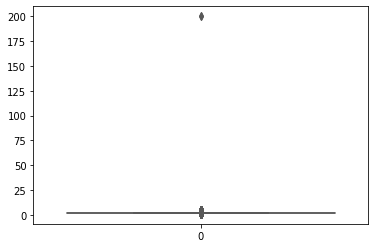

In [69]:
ax1 = sns.boxplot(data=transaction['PROD_QTY'],palette="Set2")

Outlier is customer with 200 PROD_QTY

In [71]:
df_merge.loc[df_merge['PROD_QTY'] == 200]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_BRAND
71456,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos
71457,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos


Same **LYLTY_CARD_NBR:226000, customer's transaction is an outlier**. it's total sales are also too large

Outlier customer is **OLDERFAMILIES & PREMIUM**

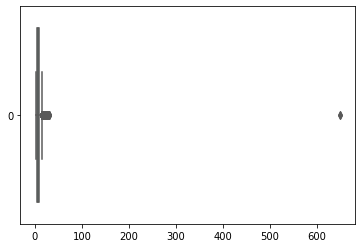

In [70]:
ax2 = sns.boxplot(data=transaction['TOT_SALES'], orient="h",palette="Set2")

# Data Visualization

## Annually

In [148]:
df_date=df_merge.groupby('DATE')[['TOT_SALES']].sum().reset_index()

In [149]:
df_date

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
359,2019-06-26,5305.0
360,2019-06-27,5202.8
361,2019-06-28,5299.6
362,2019-06-29,5497.6


In [150]:
fig_date= px.line(df_date,df_date['DATE'],df_date['TOT_SALES'])
fig_date.update_layout(title='Total Sales over time',title_x=0.5)

**DECEMBER** has more sales than other months

## Monthly

In [151]:
def monthlyPlot(m):
  monthly=df_date[df_date['DATE'].dt.month == m]
  monthly_fig= px.line(monthly,monthly['DATE'],monthly['TOT_SALES'])
  monthly_fig.update_layout(title='Total Sales in '+str(m),title_x=0.5)
  monthly_fig.show()

In [152]:
monthlyPlot(7)

In [153]:
monthlyPlot(8)

In [154]:
monthlyPlot(9)

In [155]:
monthlyPlot(10)

In [156]:
monthlyPlot(11)

In [157]:
monthlyPlot(12)

In [158]:
monthlyPlot(1)

In [159]:
monthlyPlot(2)

In [160]:
monthlyPlot(3)

In [161]:
monthlyPlot(4)

In [162]:
monthlyPlot(5)

In [163]:
monthlyPlot(6)

## By Brand

In [164]:
his_PROD_br= px.histogram(x=df_merge['PROD_BRAND'])
his_PROD_br.update_layout(title='Histogram of Brand',title_x=0.5)

In [165]:
df_brand = df_merge.groupby('PROD_BRAND')[['TOT_SALES']].sum().reset_index()

In [166]:
fig_br= px.bar(df_brand,df_brand['PROD_BRAND'],df_brand['TOT_SALES'])
fig_br.update_layout(title='Total Sales by Brand',title_x=0.5)

## Package Size

In [171]:
dt_wt=df_merge.groupby('PROD_WT')[['TOT_SALES']].sum().reset_index()

In [174]:
dt_wt

,PROD_WT,TOT_SALES
0,70,6852.0
1,90,9676.4
2,110,162765.4
3,125,5733.0
4,134,177655.5
5,135,26090.4
6,150,304288.5
7,160,10647.6
8,165,101360.6
9,170,146673.0


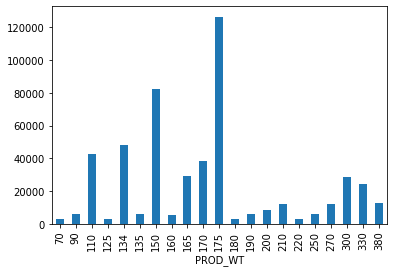

In [201]:
df_merge.groupby('PROD_WT')['PROD_QTY'].sum().plot(kind='bar')

## Life Stage

In [124]:
df_life= df_merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['LYLTY_CARD_NBR']].count().reset_index()

In [125]:
fig_life = px.bar(df_life,df_life['LIFESTAGE'],df_life['LYLTY_CARD_NBR'].unique(),df_life['PREMIUM_CUSTOMER'],text=df_life['LYLTY_CARD_NBR'].unique())
fig_life.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_life.update_layout(title='Proportion of Customers',title_x=0.5)

In [195]:
df_life_sales= df_merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().reset_index()

In [197]:
df_life_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,81958.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


In [200]:
life_sales =px.bar(df_life_sales,df_life_sales['LIFESTAGE'],df_life_sales['TOT_SALES'],df_life_sales['PREMIUM_CUSTOMER'])
life_sales.update_layout(barmode='group',title='Total Sales per Unit',title_x=0.5)

# Top Groups

## Top Customer
1. transaction
2. total sales

In [177]:
df_merge['LYLTY_CARD_NBR'].value_counts().head(10)

172032    18
162039    18
13138     17
230078    17
128178    17
116181    17
105026    16
179228    16
259100    16
104117    16
Name: LYLTY_CARD_NBR, dtype: int64

In [193]:
df_merge.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10) 

LYLTY_CARD_NBR
226000    1300.00
230078     138.60
63197      132.80
259009     127.20
162039     126.80
58361      124.80
230154     124.40
94185      122.80
130090     122.65
179228     120.80
Name: TOT_SALES, dtype: float64

## Top Store
1. transaction
2. total sales
3. product quantity

In [178]:
df_merge['STORE_NBR'].value_counts().head(10)

226    2022
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
156    1747
213    1747
Name: STORE_NBR, dtype: int64

In [192]:
df_merge.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

STORE_NBR
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: TOT_SALES, dtype: float64

In [ ]:
df_merge.groupby('STORE_NBR')['PROD_QTY'].sum().sort_values(ascending=False).head(10)

## Top Brands
1. transaction
2. total sales

In [188]:
df_merge['PROD_BRAND'].value_counts().head(10)

Kettle           41288
Smith            31823
Doritos          28147
Pringles         25102
Red Rock Deli    17779
Woolworths       14757
Infuzions        14201
Thins            14075
Cobs              9693
Tostitos          9471
Name: PROD_BRAND, dtype: int64

In [190]:
df_merge.groupby('PROD_BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(10)

PROD_BRAND
Kettle           390239.8
Doritos          241890.9
Smith            224660.2
Pringles         177655.5
Infuzions         99047.6
Red Rock Deli     95046.0
Old El Paso       90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Name: TOT_SALES, dtype: float64